# Example of masks

## Creating an instance

An instance must be created before starting to operate with vector masks. The initialization accepts several arguments.

In [12]:
%matplotlib inline

In [13]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_tests import save_figure_test
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY

from py_pol.jones_matrix import Jones_matrix

In [14]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]
rcParams['figure.dpi']=100

## Polarization from standard elements

### Using defined polarizers

<Figure size 800x600 with 0 Axes>

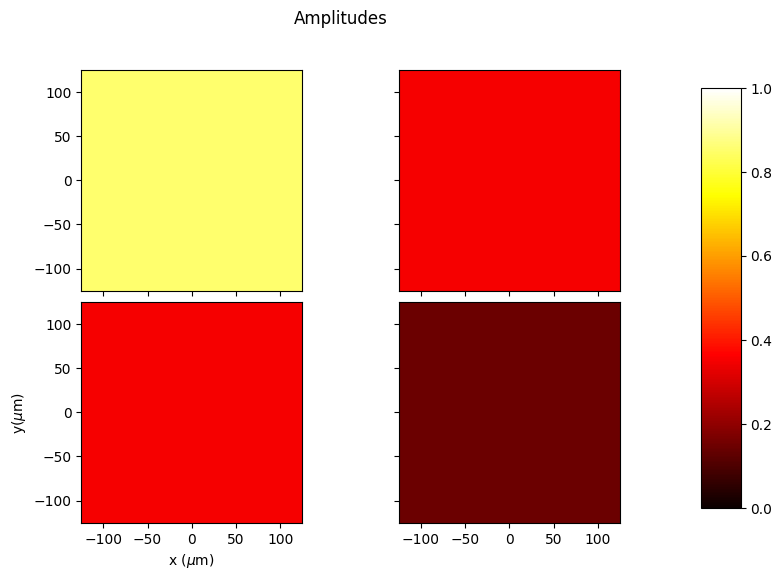

In [36]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5*degrees)
vc.draw(kind='amplitude')

### Using py_pol module

<Figure size 800x600 with 0 Axes>

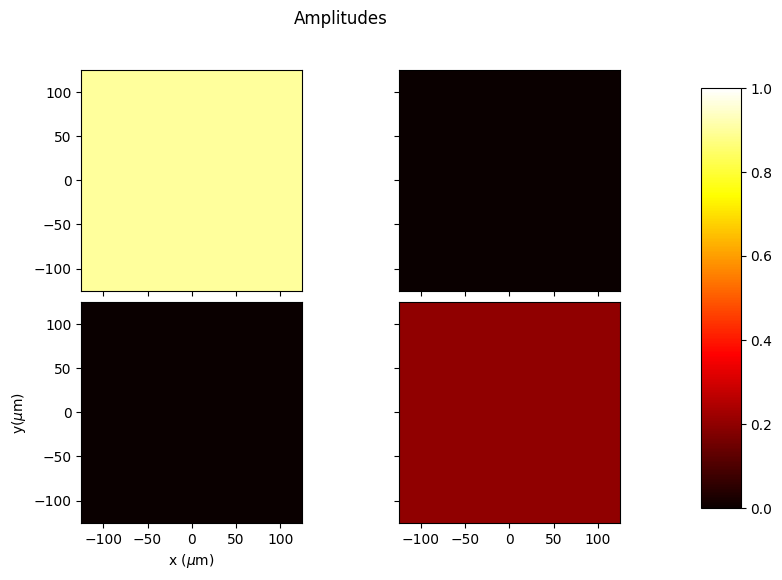

<Figure size 800x600 with 0 Axes>

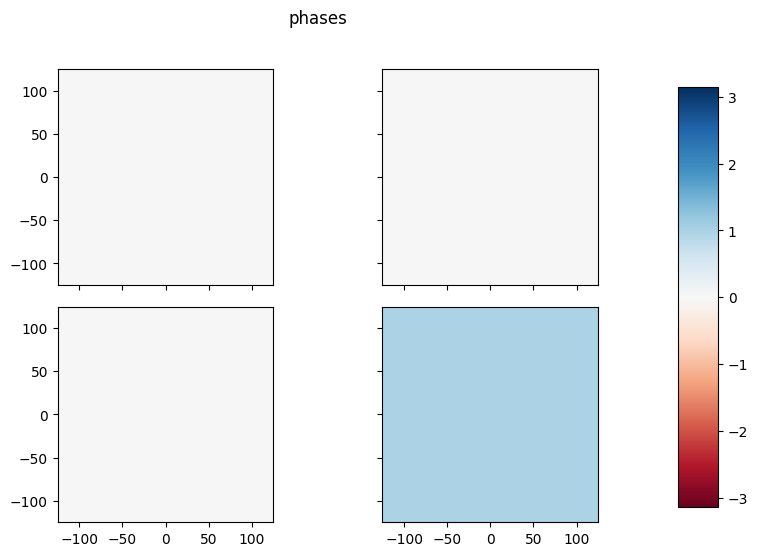

In [53]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


PL = Jones_matrix('m0')
PL.from_components([0.9, 0, 0, 0.2 * np.exp(1j)])

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.apply_polarization(PL)

vp.draw(kind='all');

## From Scalar Mask

This function uses the same mask for $E_x$ and $E_y$ fields, and it provides a different amplitud-phase to each field.

<Figure size 800x600 with 0 Axes>

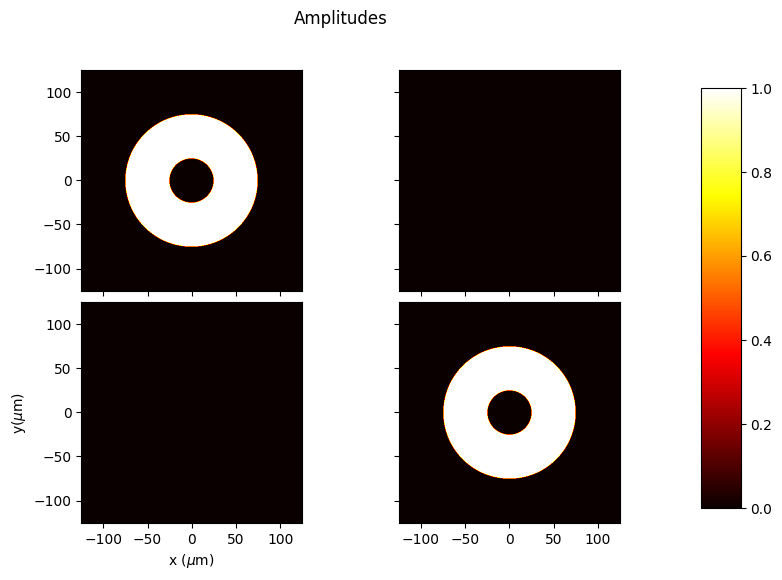

In [40]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.from_scalar_mask(u_mask=mask)
vc.draw(kind='amplitude');

## Unique mask

<Figure size 800x600 with 0 Axes>

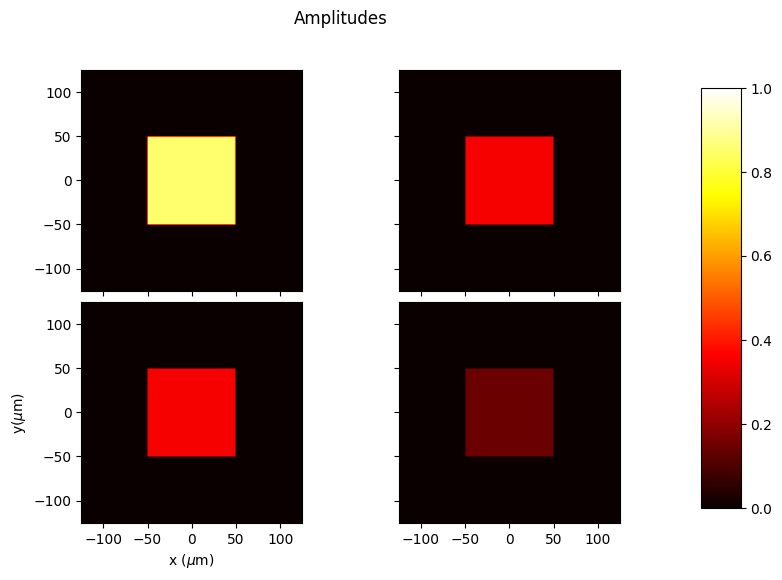

In [39]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.square(
    r0=(0 * um, 0 * um),
    size = (100*um, 100*um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5*degrees)
vc.apply_scalar_mask(u_mask=mask)
vc.draw(kind='amplitude')

## global mask

We have a field Ex, Ey and it is multiplied by a mask.

<Figure size 800x600 with 0 Axes>

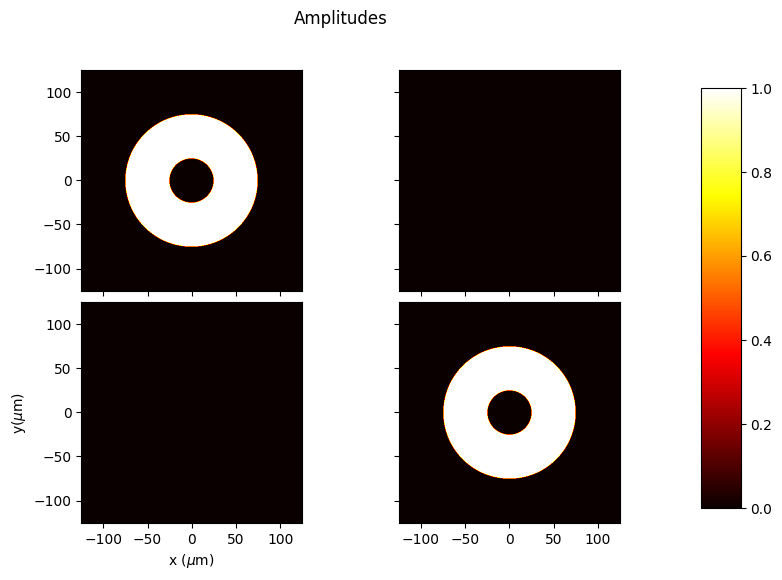

In [29]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask1.gray_scale(num_levels=128, levelMin=0, levelMax=1)


mask2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask2.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.from_scalar_mask(u_mask=mask)
EM0.draw('amplitude');

Since a circular mask is very used if mask=None, a circular mask, with r0 and radius given in parameters is provided.

In [31]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


mask1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask1.gray_scale(num_levels=128, levelMin=0, levelMax=1)


mask2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask2.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.unique_mask(mask=mask1, v=(np.exp(-1j*np.pi/2), np.exp(1j*np.pi/2)))
EM0.apply_circle()
EM0.draw('fields');

AttributeError: 'Vector_paraxial_mask_XY' object has no attribute 'unique_mask'

## Complementary mask

When we provide a binary mask, the 1 mask is converted to v1 polarization and 0 mask is converted to v2 polarization.

<Figure size 800x600 with 0 Axes>

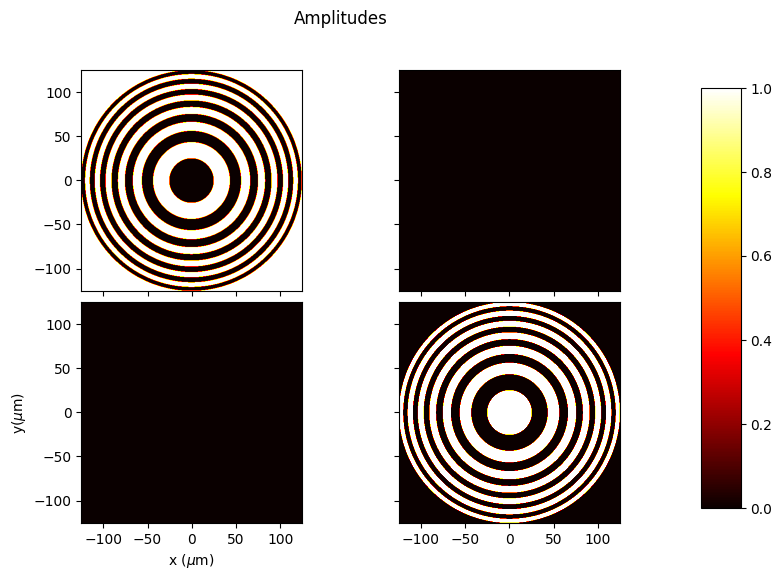

<Figure size 800x600 with 0 Axes>

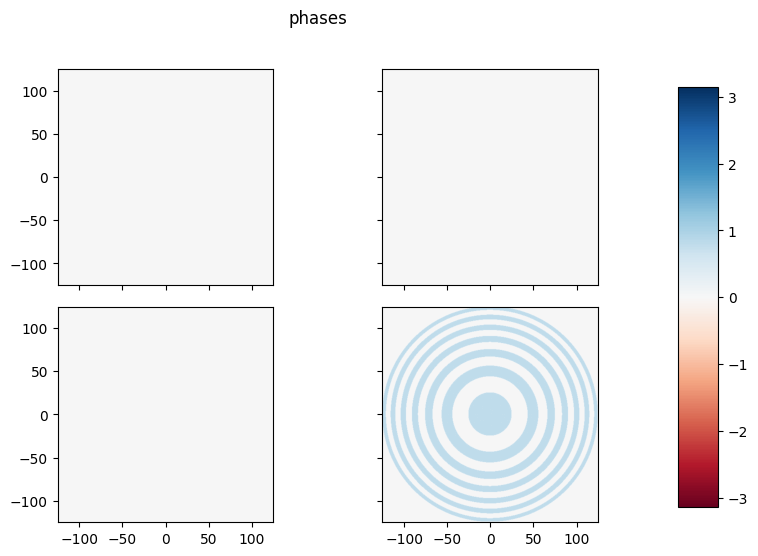

In [60]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(125 * um, 125 * um),
    focal=(2 * mm, 2 * mm),
    angle=0 * degrees,
    mask=True,
    kind='amplitude')

EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.complementary_masks(mask=mask,    
                        state_0=np.array([[1, 0], [0, 0]]),
                        state_1=np.array([[0, 0], [0, 1+1j]]))
EM0.draw(kind='all');

## Pass to py_pol

In [61]:
m0 = EM0.to_py_pol()

In [64]:
ret=m0.parameters.mean_transmission()

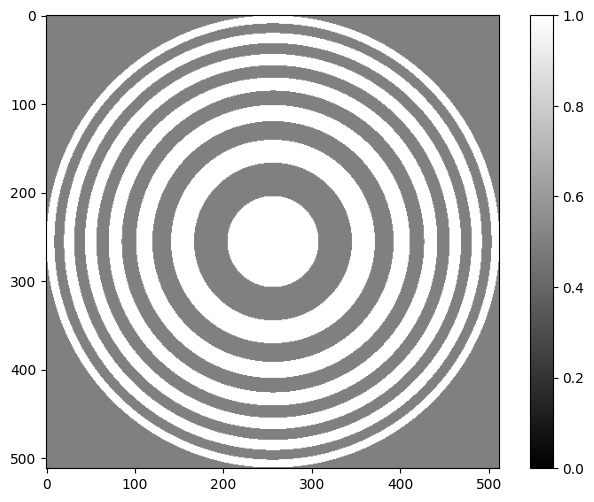

In [76]:
im=plt.imshow(ret)
plt.colorbar()
im.set_cmap('gray')
plt.clim(0,1)